# Task 1.1 Data Understanding

**Authors:** Abderrahmane Salmi, Ricardo Talarico, Lorenzo Allegrini

Import Libraries & Load Datasets

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
tracks_df = pd.read_csv('../datasets/tracks.csv')
artists_df = pd.read_csv('../datasets/artists.csv', sep=';')

Initial Inspection

In [ ]:
# First few tracks
tracks_df.head()

,id,id_artist,name_artist,full_title,title,featured_artists,primary_artist,language,album,stats_pageviews,...,album_type,disc_number,track_number,duration_ms,explicit,popularity,album_image,id_album,lyrics,modified_popularity
0,TR934808,ART04205421,Rosa Chemical,​polka 2 :-/ by Rosa Chemical (Ft. Ernia & Guè),​polka 2 :-/,"Ernia, Guè",Rosa Chemical,pl,FOREVER AND EVER,196033.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Oplà, ah\nBdope, chiama due b—\n\nMi candidere...",False
1,TR760029,ART04205421,Rosa Chemical,POLKA by Rosa Chemical (Ft. Thelonious B.),POLKA,Thelonious B.,Rosa Chemical,en,FOREVER AND EVER,164450.0,...,album,1.0,3.0,207761.0,True,46.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Greg Willen, non dormire\n(Brr-poh)\n\nT-T-Tro...",False
2,TR916821,ART04205421,Rosa Chemical,​britney ;-) by Rosa Chemical (Ft. MamboLosco ...,​britney ;-),"MamboLosco, RADICAL",Rosa Chemical,en,FOREVER AND EVER,58313.0,...,album,1.0,1.0,193544.0,True,39.0,https://i.scdn.co/image/ab67616d0000b2736d5e14...,ALB115557,"Mothz\nYeah, yeah, yeah-yeah\nBdope, chiama du...",False
3,TR480968,ART04205421,Rosa Chemical,CEO by Rosa Chemical (Ft. Taxi B),CEO,Taxi B,Rosa Chemical,it,OKAY OKAY !! - EP,39890.0,...,single,1.0,2.0,169000.0,True,47.0,https://i.scdn.co/image/ab67616d0000b27367c03d...,ALB730959,Designer sui vestiti penso di essere un outlet...,False
4,TR585039,ART04205421,Rosa Chemical,LONDRA by Rosa Chemical (Ft. Rkomi),LONDRA,Rkomi,Rosa Chemical,en,FOREVER AND EVER,35432.0,...,album,1.0,8.0,194779.0,True,41.0,https://i.scdn.co/image/ab67616d0000b273fcdb60...,ALB436151,"Bdope (Yeah)\n\nVuole solo me, non fare la gel...",False


In [ ]:
# First few artists
artists_df.head()

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN


Feature Summary

In [16]:
# Dataset shape
print("Tracks dataset shape:", tracks_df.shape)

# Info summary
tracks_df.info()

Tracks dataset shape: (11166, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11166 entries, 0 to 11165
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    11166 non-null  object 
 1   id_artist             11166 non-null  object 
 2   name_artist           11166 non-null  object 
 3   full_title            11166 non-null  object 
 4   title                 11166 non-null  object 
 5   featured_artists      3517 non-null   object 
 6   primary_artist        11166 non-null  object 
 7   language              11061 non-null  object 
 8   album                 9652 non-null   object 
 9   stats_pageviews       4642 non-null   float64
 10  swear_IT              11166 non-null  int64  
 11  swear_EN              11166 non-null  int64  
 12  swear_IT_words        11166 non-null  object 
 13  swear_EN_words        11166 non-null  object 
 14  year                  10766 non-null

In [17]:
# Same thing for artists
print("Artists dataset shape:", artists_df.shape)
artists_df.info()

Artists dataset shape: (104, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [18]:
# Quick look at number of unique values per column (to understand categorical vars)
tracks_df.nunique().sort_values(ascending=False)

full_title              11164
lyrics                  11153
id                      11093
rolloff                 10785
pitch                   10782
spectral_complexity     10579
loudness                10561
title                   10521
char_per_tok             9844
duration_ms              7910
lexical_density          7761
avg_token_per_clause     7569
tokens_per_sent          6877
flux                     4633
stats_pageviews          4422
bpm                      4119
id_album                 3061
rms                      2775
swear_IT_words           2659
flatness                 2536
album_image              2486
album_name               2421
featured_artists         1740
centroid                 1450
album_release_date       1390
n_tokens                 1063
zcr                       970
album                     890
swear_EN_words            535
year                      195
n_sentences               176
popularity                170
id_artist                 104
name_artis

In [19]:
# Quick look at number of unique values per column (to understand categorical vars)
artists_df.nunique().sort_values(ascending=False)

id_author       104
name            104
birth_date       73
description      69
longitude        40
birth_place      40
latitude         40
province         26
active_start     24
region           13
nationality       2
gender            2
country           1
active_end        0
dtype: int64

Missing Values Heatmap & Stats

In [20]:
# Missing values count
tracks_missing = tracks_df.isnull().sum().sort_values(ascending=False)

print("Tracks dataset missing values:")
print(tracks_missing[tracks_missing > 0])

Tracks dataset missing values:
featured_artists        7649
stats_pageviews         6524
album                   1514
day                     1323
month                   1197
year                     400
language                 105
id_album                  78
album_name                78
album_image               78
album_type                78
album_release_date        78
track_number              78
explicit                  78
duration_ms               78
disc_number               78
lexical_density           76
tokens_per_sent           76
n_tokens                  76
char_per_tok              76
n_sentences               76
avg_token_per_clause      76
flatness                  64
flux                      64
zcr                       64
centroid                  64
bpm                       64
rolloff                   64
rms                       64
pitch                     64
spectral_complexity       64
loudness                  64
lyrics                     3
popularity  

In [21]:
artists_missing = artists_df.isnull().sum().sort_values(ascending=False)

print("\nArtists dataset missing values:")
print(artists_missing[artists_missing > 0])


Artists dataset missing values:
active_end      104
active_start     54
region           36
province         34
country          34
nationality      33
birth_place      32
latitude         32
longitude        32
birth_date       31
description      18
dtype: int64


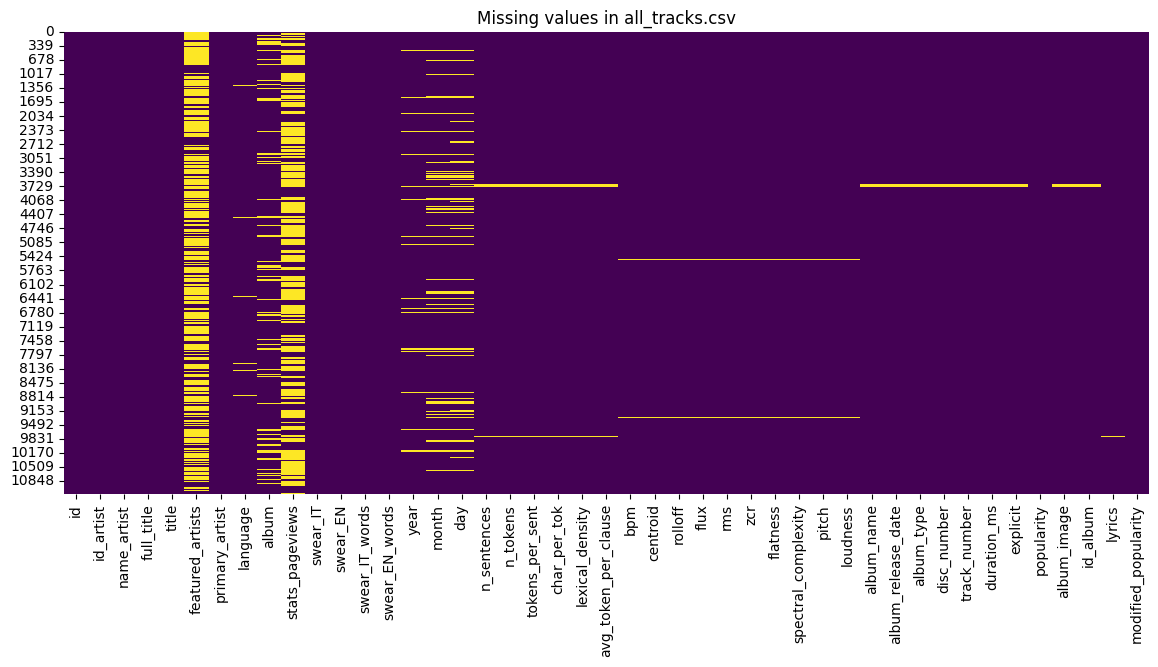

In [ ]:
# Heatmap for missing data (tracks)
plt.figure(figsize=(14,6))
sns.heatmap(tracks_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in all_tracks.csv")
plt.show()

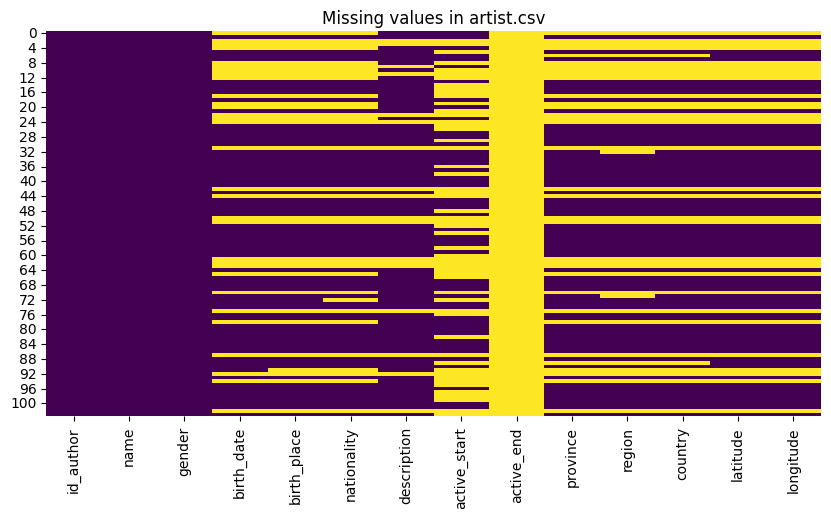

In [23]:
# Heatmap for missing data (artists)
plt.figure(figsize=(10,5))
sns.heatmap(artists_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in artist.csv")
plt.show()

Duplicate Check

In [24]:
# Check for duplicates
print("Duplicate tracks:", tracks_df.duplicated().sum())
print("Duplicate artists:", artists_df.duplicated().sum())

Duplicate tracks: 0
Duplicate artists: 0


Data Type Review & Type Casting Plan

In [25]:
# Check data types
tracks_df.dtypes.sort_values()

modified_popularity        bool
swear_EN                  int64
swear_IT                  int64
lexical_density         float64
bpm                     float64
centroid                float64
rolloff                 float64
flux                    float64
char_per_tok            float64
rms                     float64
flatness                float64
spectral_complexity     float64
pitch                   float64
loudness                float64
disc_number             float64
track_number            float64
duration_ms             float64
zcr                     float64
tokens_per_sent         float64
avg_token_per_clause    float64
n_sentences             float64
day                     float64
month                   float64
stats_pageviews         float64
n_tokens                float64
id_album                 object
album_image              object
popularity               object
explicit                 object
id_artist                object
name_artist              object
full_tit

In [26]:
# Check data types
artists_df.dtypes.sort_values()

active_end      float64
latitude        float64
longitude       float64
id_author        object
name             object
gender           object
birth_date       object
birth_place      object
nationality      object
description      object
active_start     object
province         object
region           object
country          object
dtype: object

In [ ]:
# === Function to generate missing info dictionary ===
def get_missing_info(df, threshold):
    row_missing = {}
    for idx in df.index:
        missing_count = df.loc[idx].isnull().sum()
        if missing_count > 0:
            row_missing[idx] = {
                'missing_count': missing_count,
                'missing_pct': round(missing_count / len(df.columns), 3)
            }

    # Sort dictionary by missing_pct descending
    sorted_missing = dict(sorted(row_missing.items(), key=lambda x: x[1]['missing_pct'], reverse=True))

    # Get list of row indices to drop
    to_drop = [idx for idx, info in sorted_missing.items() if info['missing_pct'] > threshold]

    return sorted_missing, to_drop

# === Adjustable thresholds (percentage of missing values) ===
track_missing_thresh = 0.3
artist_missing_thresh = 0.5

# === Tracks ===
print("\n--- TRACKS ---")
track_missing_dict, tracks_to_drop = get_missing_info(tracks_df, track_missing_thresh)

# Preview top 5 rows with most missing fields
print("Top 5 rows with most missing fields (tracks):")
for i, (idx, info) in enumerate(track_missing_dict.items()):
    print(f"Row {idx}: {info}")
    if i == 4:
        break

print(f"\nTracks rows with more than {track_missing_thresh} missing fields: {len(tracks_to_drop)}")

# === Artists ===
print("\n--- ARTISTS ---")
artist_missing_dict, artists_to_drop = get_missing_info(artists_df, artist_missing_thresh)

print("Top 5 rows with most missing fields (artists):")
for i, (idx, info) in enumerate(artist_missing_dict.items()):
    print(f"Row {idx}: {info}")
    if i == 4:
        break

print(f"\nArtist rows with more than {artist_missing_thresh} missing fields: {len(artists_to_drop)}")



--- TRACKS ---
Top 5 rows with most missing fields (tracks):
Row 3704: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3733: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3736: {'missing_count': np.int64(20), 'missing_pct': np.float64(0.444)}
Row 3675: {'missing_count': np.int64(19), 'missing_pct': np.float64(0.422)}
Row 3677: {'missing_count': np.int64(19), 'missing_pct': np.float64(0.422)}

Tracks rows with more than 0.3 missing fields: 88

--- ARTISTS ---
Top 5 rows with most missing fields (artists):
Row 2: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 3: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 11: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 22: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}
Row 24: {'missing_count': np.int64(11), 'missing_pct': np.float64(0.786)}

Artist rows with more than 0.4 missing fields: 32


In [30]:
# Step 1: Get artist IDs to be dropped
artist_ids_to_drop = artists_df.loc[artists_to_drop, 'id_author'].dropna().unique()

# Step 2: Count how many tracks are by those artists
tracks_by_dropped_artists = tracks_df[tracks_df['id_artist'].isin(artist_ids_to_drop)]
n_tracks_to_drop_due_to_artists = len(tracks_by_dropped_artists)

print(f"\nNumber of tracks associated with the artists that would be deleted: {n_tracks_to_drop_due_to_artists}")



Number of tracks associated with the artists that would be deleted: 2578
